# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [2]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

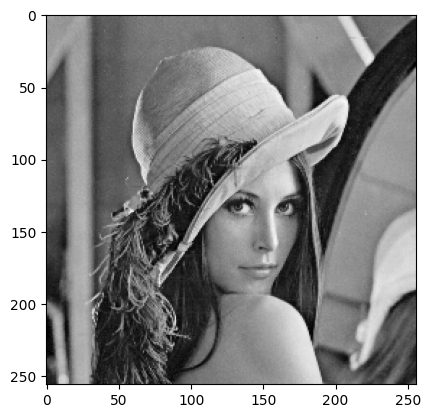

In [3]:
img=plt.imread("data/lena.png")
plt.imshow(img,"gray")

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    # define N to be the total number of pixels in the square, to be used later to divide by
    N=size*size
    # iterate through all pixels p of the image
    for p in numpy.ndindex(img.shape):
        # handle the edges, i.e. when too close to the edge for the matrix to "grab", set the value to 0 by default
        if (p[0]<n or p[0]>(img.shape[0]-1-n) or p[1]<n or p[1]>(img.shape[1]-1-n)):
            result[p]=0 
        else: 
            # compute the mean value by applying the filter matrix to the square of the image centered around p       
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
               # use an offset to shift the q-matrix to center around (0,0)
               neighborhood_sum+=img[p[0]+q[0]-n,p[1]+q[1]-n]
            # divide by N   
            result[p]=neighborhood_sum/N
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

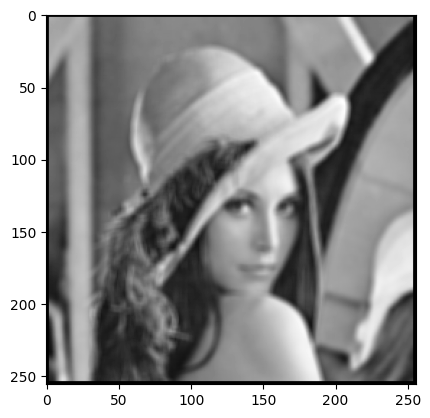

In [4]:
img_mean=meanfilter(img,5)
plt.imshow(img_mean,"gray")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

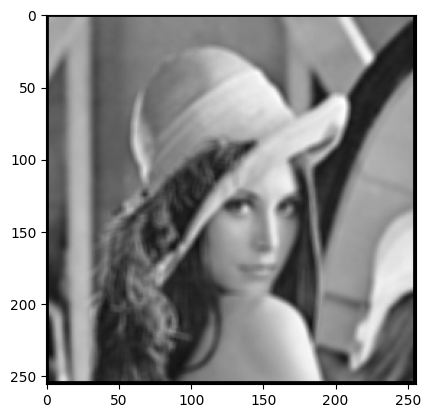

In [5]:
correct=plt.imread("data/lena_meanfilter5.png")
plt.imshow(correct,"gray")
assert numpy.allclose(img_mean, correct, atol=1/255)


---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [8]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    # define N as the "middle" index of the sequence to be used later
    N=(size*size-1)//2
    # iterate through all pixels p of the image
    for p in numpy.ndindex(img.shape):
        # handle the edges, i.e. when too close to the edge for the matrix to "grab", set the value to 0 by default
        if (p[0]<n or p[0]>(img.shape[0]-1-n) or p[1]<n or p[1]>(img.shape[1]-1-n)):
            result[p]=0 
        else: 
            # compute the median value by selecting the pixel values from the square around p, sort, and then select the middle value (we always have an odd number of elements in the sequence, so the median is always clearly the middle one)   
            neighborhood_list = list()
            for q in numpy.ndindex(size, size):
               # use an offset to shift the q-matrix to center around (0,0), and append the respective pixel value to the list
               neighborhood_list.append(img[p[0]+q[0]-n,p[1]+q[1]-n])
            # sort the list
            neighborhood_list.sort()   
            # pick the middle value from the list, located at index N
            result[p]=neighborhood_list[N]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

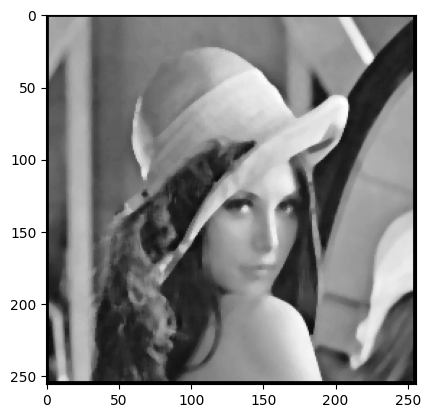

In [9]:
img_median=medianfilter(img,5)
plt.imshow(img_median,"gray")

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

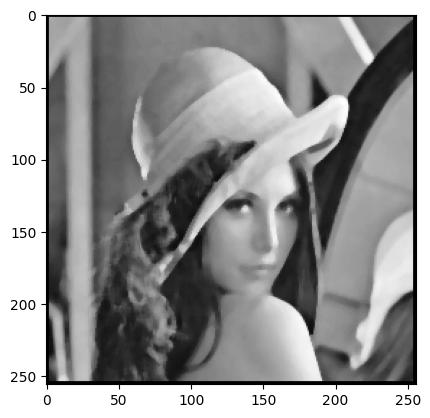

In [10]:
correct_median=plt.imread("data/lena_medianfilter5.png")
plt.imshow(correct_median,"gray")
assert numpy.allclose(img_median, correct_median, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [24]:
print(3.019607976078987/0.5764706)


5.238095361808541


**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: